In [1]:
from sklearn.datasets import fetch_openml

mnist_data = fetch_openml('mnist_784',as_frame=False)

In [2]:
#print the mnist data sets
print(mnist_data)

{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55'

In [3]:
X,y = mnist_data.data,mnist_data.target

In [4]:
#plot the images
import matplotlib.pyplot as plt
def plot_images(mnist_data):
    images = mnist_data.reshape(28,28)
    plt.imshow(images,cmap="binary")
    plt.axes("off")
    some_digit = X[0]
    plot_digit(some_digit)
    plt.show()

In [5]:
# train and test data distribution
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [7]:
from sklearn.linear_model import SGDClassifier

sg_clasifier = SGDClassifier(random_state=42)
sg_clasifier.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [8]:
some_digit =X[[0]]

In [9]:
sg_clasifier.predict(some_digit)

array([ True])

In [10]:
#check acuracy by using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sg_clasifier,X_train,y_train_5,cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [11]:
#using dumy clasifier data set
from sklearn.dummy import DummyClassifier

dummy_clf =DummyClassifier()
dummy_clf.fit(X_train,y_train_5)

dummy_clf.predict(some_digit)

cross_val_score(dummy_clf,X_train,y_train_5,cv=5,scoring="accuracy")

array([0.90958333, 0.90966667, 0.90966667, 0.90966667, 0.90966667])

In [12]:
from sklearn.model_selection import cross_val_predict
predict_data = cross_val_predict(sg_clasifier,X_train,y_train_5,cv=3)

In [13]:
predict_data

array([ True, False, False, ...,  True, False, False])

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,predict_data)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [15]:
y_scores = cross_val_predict(sg_clasifier, X_train, y_train_5, cv=3,method="decision_function")

In [16]:
y_scores = sg_clasifier.decision_function(some_digit)
y_scores

array([2164.22030239])

In [17]:
thresoulds = 0
y_some_digit_predict =(y_scores>thresoulds)
y_some_digit_predict


array([ True])

In [18]:
thresouldss=30000
y_some_digit_predict=(y_scores>thresouldss)
y_some_digit_predict

array([False])

In [19]:
y_scores = cross_val_predict(sg_clasifier, X_train, y_train_5, cv=3,method="decision_function")

In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recslls, thresholds = precision_recall_curve(y_train_5,y_scores)

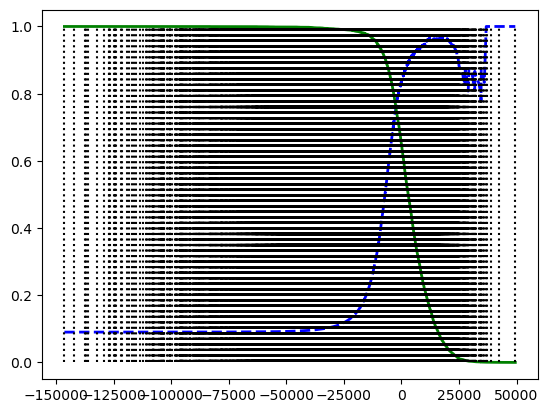

In [21]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recslls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="threshold")

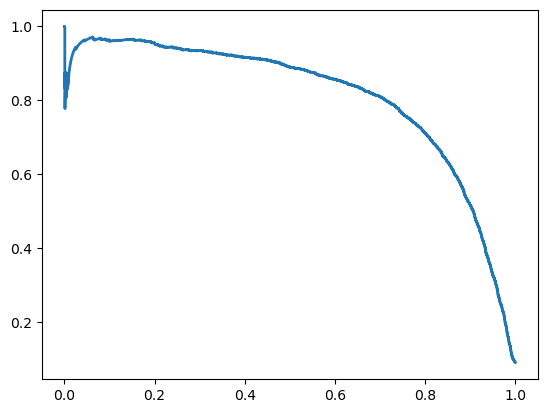

In [22]:
plt.plot(recslls, precisions, linewidth=2, label="Precision/Recall curve")
#[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()


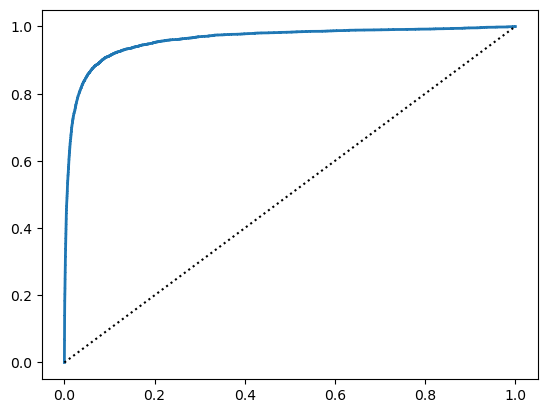

In [23]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_train_5,y_scores)
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

[...] # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()


In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [25]:
from sklearn.ensemble import RandomForestClassifier

r_clf=RandomForestClassifier(random_state=43)

y_probs_predict = cross_val_predict(r_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [26]:
y_probs_predict[:2]

array([[0.07, 0.93],
       [0.98, 0.02]])

In [28]:
y_scores_forest = y_probs_predict[:,1]

precisions_forest,recslls_forest,threshold_forest=precision_recall_curve(y_train_5,y_scores_forest)

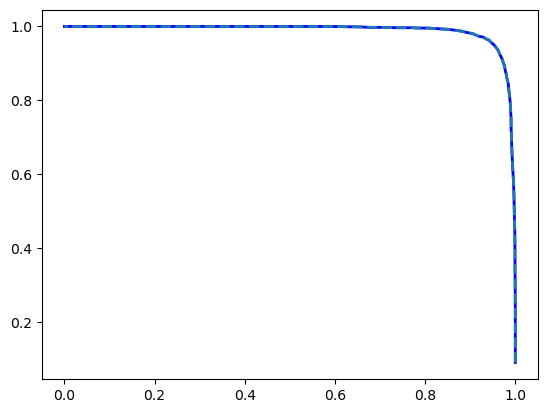

In [30]:
plt.plot(recslls_forest, precisions_forest, "b-", linewidth=2,
label="Random Forest")
plt.plot(recslls_forest, precisions_forest, "--", linewidth=2, label="SGD")
[...] # beautify the figure: add labels, grid, and legend
plt.show()


In [34]:
y_train_pred_forest = y_probs_predict[:, 1] >= 0.5


In [32]:
from sklearn.metrics import f1_score

In [35]:
f1_score(y_train_5, y_train_pred_forest)

0.9288228392647634

In [36]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984888909627533